In [1]:
import pandas as pd

NEWDF = pd.read_excel('AROUSAL.xlsx')

In [26]:
NEWDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 11 columns):
 FSX FIXMEAN    84 non-null float64
DX FIXMEAN      84 non-null float64
MEANMOB SX      84 non-null float64
MEANMOB DX      84 non-null float64
HF MOB          84 non-null float64
HF FIX          84 non-null float64
LF MOB          84 non-null float64
LF FIX          84 non-null float64
LF/HF FIX       84 non-null float64
LF/HF MOB       84 non-null float64
"TARGET"        84 non-null int64
dtypes: float64(10), int64(1)
memory usage: 7.3 KB


DATA PREPARATION

In [32]:
import numpy as np

from scipy import stats

z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [85]:

df

,FSX FIXMEAN,DX FIXMEAN,MEANMOB SX,MEANMOB DX,HF MOB,HF FIX,LF MOB,LF FIX,LF/HF FIX,LF/HF MOB,"""TARGET"""
0,2.890,2.681,2.203,2.128,0.00242,0.00189,0.00526,0.00371,2.171,1.980,0
1,3.233,3.277,3.370,3.419,0.01320,0.00669,0.02490,0.01590,1.977,2.346,0
2,3.552,3.439,2.657,2.867,0.04180,0.04120,0.07220,0.07790,3.222,2.210,0
3,3.477,3.555,2.558,2.743,0.01700,0.00932,0.01660,0.00996,1.047,1.120,0
4,3.712,3.588,2.771,2.996,0.00675,0.00703,0.01670,0.02490,2.690,3.558,0
...,...,...,...,...,...,...,...,...,...,...,...
79,3.577,3.559,2.939,3.292,0.00530,0.00903,0.02970,0.04570,6.174,5.610,2
80,2.771,2.785,3.227,3.068,0.00992,0.00860,0.04070,0.02980,4.336,3.582,2
81,3.868,3.922,2.728,2.881,0.03830,0.05230,0.03820,0.07670,1.310,1.409,2
82,3.861,3.772,2.283,2.355,0.00305,0.00367,0.01030,0.01320,3.343,3.436,2


DATA VISUALIZATION

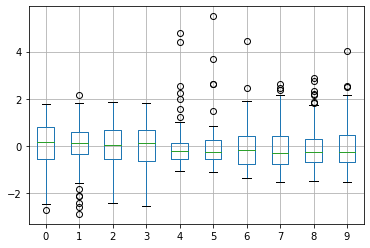

In [66]:
#trying to operate some standardization for PCA analysis 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler() #or alternatively use MinMaxScaler

df_normalized = scaler.fit_transform(df.iloc[:,0:-1]); 

%matplotlib inline
df_dataframe = pd.DataFrame(df_normalized) 
df_dataframe.boxplot()

,0,1,2,3,4,5,6,7,8,9
0,-1.617141,-2.437378,-1.881915,-2.509698,-1.079949,-1.125974,-1.360867,-1.522381,-0.651579,-0.838742
1,-0.704142,-0.763764,1.878693,1.370233,-0.083845,-0.669792,-0.399127,-0.920273,-0.796758,-0.534701
2,0.144973,-0.308855,-0.418920,-0.288730,2.558880,2.609970,1.917078,2.142130,0.134934,-0.647678
3,-0.054662,0.016882,-0.737943,-0.661396,0.267287,-0.419842,-0.805565,-1.213671,-1.492721,-1.553154
4,0.570862,0.109548,-0.051559,0.098962,-0.679844,-0.637479,-0.800668,-0.475731,-0.263187,0.472121
...,...,...,...,...,...,...,...,...,...,...
79,0.211518,0.028114,0.489814,0.988552,-0.813828,-0.447403,-0.164079,0.551656,2.344056,2.176741
80,-1.933895,-2.145338,1.417881,0.315349,-0.386926,-0.488269,0.374573,-0.233702,0.968593,0.492058
81,0.986103,1.047446,-0.190125,-0.246655,2.235470,3.664892,0.252152,2.082858,-1.295906,-1.313078
82,0.967471,0.626235,-1.624119,-1.827479,-1.021735,-0.956807,-1.114066,-1.053636,0.225484,0.370774


In [77]:
df

,FSX FIXMEAN,DX FIXMEAN,MEANMOB SX,MEANMOB DX,HF MOB,HF FIX,LF MOB,LF FIX,LF/HF FIX,LF/HF MOB,"""TARGET"""
0,2.890,2.681,2.203,2.128,0.00242,0.00189,0.00526,0.00371,2.171,1.980,0
1,3.233,3.277,3.370,3.419,0.01320,0.00669,0.02490,0.01590,1.977,2.346,0
2,3.552,3.439,2.657,2.867,0.04180,0.04120,0.07220,0.07790,3.222,2.210,0
3,3.477,3.555,2.558,2.743,0.01700,0.00932,0.01660,0.00996,1.047,1.120,0
4,3.712,3.588,2.771,2.996,0.00675,0.00703,0.01670,0.02490,2.690,3.558,0
...,...,...,...,...,...,...,...,...,...,...,...
79,3.577,3.559,2.939,3.292,0.00530,0.00903,0.02970,0.04570,6.174,5.610,2
80,2.771,2.785,3.227,3.068,0.00992,0.00860,0.04070,0.02980,4.336,3.582,2
81,3.868,3.922,2.728,2.881,0.03830,0.05230,0.03820,0.07670,1.310,1.409,2
82,3.861,3.772,2.283,2.355,0.00305,0.00367,0.01030,0.01320,3.343,3.436,2


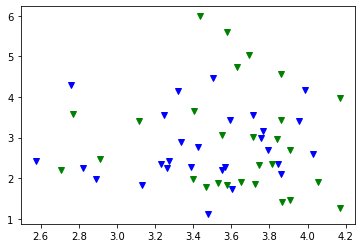

In [120]:
import matplotlib.pyplot as plt

import numpy as np

df_numeric = df.to_numpy()

fig,ax = plt.subplots(1,1)
plt.plot(df_numeric[df.iloc[:,10]==0,0],df_numeric[df.iloc[:,10]==0,9],'bv')
#plt.plot(df_numeric[df.iloc[:,10]==1,0],df_numeric[df.iloc[:,10]==1,9],'rv')
plt.plot(df_numeric[df.iloc[:,10]==2,0],df_numeric[df.iloc[:,10]==2,9],'gv')

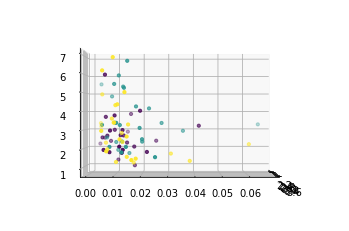

In [118]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['MEANMOB DX'], df['HF MOB'],df['LF/HF FIX'], c=df['"TARGET"'], s=10)
ax.view_init(0, 0)
plt.show()



In [147]:
X = df.iloc[:,0:-1]
X.info

<bound method DataFrame.info of      FSX FIXMEAN  DX FIXMEAN  MEANMOB SX  MEANMOB DX   HF MOB   HF FIX  \
0          2.890       2.681       2.203       2.128  0.00242  0.00189   
1          3.233       3.277       3.370       3.419  0.01320  0.00669   
2          3.552       3.439       2.657       2.867  0.04180  0.04120   
3          3.477       3.555       2.558       2.743  0.01700  0.00932   
4          3.712       3.588       2.771       2.996  0.00675  0.00703   
..           ...         ...         ...         ...      ...      ...   
79         3.577       3.559       2.939       3.292  0.00530  0.00903   
80         2.771       2.785       3.227       3.068  0.00992  0.00860   
81         3.868       3.922       2.728       2.881  0.03830  0.05230   
82         3.861       3.772       2.283       2.355  0.00305  0.00367   
83         4.171       3.902       3.209       3.387  0.01380  0.01700   

     LF MOB   LF FIX  LF/HF FIX  LF/HF MOB  
0   0.00526  0.00371      2.171   

In [149]:
#PCA fit
from sklearn.decomposition import PCA
# we can choose the number of components e.g. 10, the percentage of the total variance or set it to None (that means it automatically chooses the number of components)
pca = PCA(n_components=10)
pca.fit(X) #The fit learns some quantities from the data, most importantly the "components"
#let's use the pca to transform the dataset
x_pca = pca.transform(X)
print("Dataset shape before PCA: ", X.shape)
print("Dataset shape after PCA: ", x_pca.shape)

Dataset shape before PCA:  (84, 10)
Dataset shape after PCA:  (84, 10)


In [150]:
pd.DataFrame(pca.explained_variance_).transpose()

,0,1,2,3,4,5,6,7,8,9
0,3.039988,0.269155,0.216903,0.185699,0.027988,0.015031,0.000612,0.000072,0.000022,0.000008


In [ ]:
pd.DataFrame(pca.explained_variance_).transpose()
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca.explained_variance_ratio_).transpose()
explained_var
%matplotlib inline
import seaborn as sns
sns.barplot( data=explained_var)

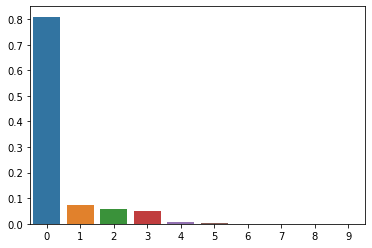

In [151]:
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca.explained_variance_ratio_).transpose()
explained_var
%matplotlib inline
import seaborn as sns
sns.barplot( data=explained_var)

In [155]:
# Let see the coordinates of the data in the PCA 
principalDf = pd.DataFrame(data = x_pca
             , columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8','pc9','pc10'])
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-1.248539,-0.779702,0.975783,0.882538,0.204066,0.002478,-0.029835,-0.007647,-0.004062,-0.002392
1,-1.199873,-0.167677,0.303059,-0.803527,0.184363,-0.021967,-0.015619,0.004491,0.002576,-0.000220
2,-0.376133,-0.556159,-0.349229,0.308192,0.064309,-0.107143,0.055746,-0.001255,0.006777,-0.004107
3,-2.726214,-0.153780,0.161400,0.306533,-0.007303,0.025080,-0.008063,0.004144,-0.001921,-0.002455
4,0.102283,0.623255,0.268314,-0.111531,0.005349,-0.111406,-0.013951,-0.005318,0.001214,0.000832


In [156]:
np.shape(pca.components_.T)

AttributeError: 'PCA' object has no attribute 'components_'

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale


pca = decomposition.PCA(n_components=10)
PCA = pca.fit_transform(X)

loadings = pd.DataFrame(pca.components_.T, columns=['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8','pc9','pc10'])

loadings

### COEFFICIENT THAT EXPLAINS THE LINEAR COMBINATION COMPUTED FOR THE FIRST 2 PC FORM THE STARTING FEATURES


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-0.036267,0.498781,-0.512866,0.184883,0.361392,-0.566533,-0.032931,-0.005125,0.002174,-0.002887
1,-0.050235,0.416196,-0.542281,0.009013,-0.420563,0.593921,0.020782,0.005914,-0.004207,0.002917
2,0.004095,-0.017258,-0.162054,-0.646609,0.660780,0.343215,-0.021495,-0.017951,0.009456,-0.004467
3,-0.008201,-0.073434,-0.177067,-0.709274,-0.501839,-0.455877,0.004216,0.020313,-0.000714,0.004397
4,-0.001252,0.001340,-0.003740,0.004115,0.017312,-0.002439,0.331849,0.529705,0.669860,-0.400295
5,-0.000863,-0.005019,-0.009270,0.002735,0.005862,-0.009525,0.325204,-0.283667,0.508240,0.745133
6,0.004153,-0.004543,-0.013137,-0.001233,0.043741,-0.009661,0.636409,0.481995,-0.535917,0.270626
7,0.005593,-0.005423,-0.013924,-0.003544,0.003573,-0.019263,0.613731,-0.637037,-0.075132,-0.459590
8,0.747969,-0.471241,-0.444461,0.142694,0.014893,-0.003337,-0.017495,0.003689,0.003300,-0.001731
9,0.660733,0.591745,0.432751,-0.155447,-0.039587,0.010257,0.011622,-0.000648,0.001933,0.004510


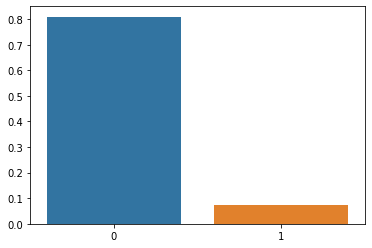

In [159]:
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca.explained_variance_ratio_).transpose()
explained_var
%matplotlib inline
import seaborn as sns
sns.barplot( data=explained_var)

In [162]:
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-1.248539,-0.779702,0.975783,0.882538,0.204066,0.002478,-0.029835,-0.007647,-0.004062,-0.002392
1,-1.199873,-0.167677,0.303059,-0.803527,0.184363,-0.021967,-0.015619,0.004491,0.002576,-0.000220
2,-0.376133,-0.556159,-0.349229,0.308192,0.064309,-0.107143,0.055746,-0.001255,0.006777,-0.004107
3,-2.726214,-0.153780,0.161400,0.306533,-0.007303,0.025080,-0.008063,0.004144,-0.001921,-0.002455
4,0.102283,0.623255,0.268314,-0.111531,0.005349,-0.111406,-0.013951,-0.005318,0.001214,0.000832
...,...,...,...,...,...,...,...,...,...,...
79,4.068816,0.091488,-0.387331,-0.277249,-0.097493,-0.120546,-0.028367,0.001402,0.009401,0.000939
80,1.425163,-0.955060,0.378120,-0.407551,0.292869,0.062872,-0.017823,0.003769,0.001977,0.000888
81,-2.371199,0.227350,-0.283651,0.166873,0.017014,0.017101,0.058126,-0.028169,0.019842,-0.003146
82,0.498624,0.449838,-0.058037,0.800033,-0.004820,0.035089,-0.033663,-0.003404,-0.001351,0.001241


In [165]:
principalDf['Target']=df['"TARGET"']

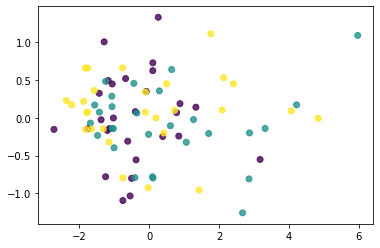

In [167]:
import numpy as np
import matplotlib.pyplot as plt

x = principalDf.iloc[:,0]
y = principalDf.iloc[:,1]



plt.scatter(x, y,alpha=0.8,c=df['"TARGET"'] )
plt.show()

In [168]:
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,Target
0,-1.248539,-0.779702,0.975783,0.882538,0.204066,0.002478,-0.029835,-0.007647,-0.004062,-0.002392,0
1,-1.199873,-0.167677,0.303059,-0.803527,0.184363,-0.021967,-0.015619,0.004491,0.002576,-0.000220,0
2,-0.376133,-0.556159,-0.349229,0.308192,0.064309,-0.107143,0.055746,-0.001255,0.006777,-0.004107,0
3,-2.726214,-0.153780,0.161400,0.306533,-0.007303,0.025080,-0.008063,0.004144,-0.001921,-0.002455,0
4,0.102283,0.623255,0.268314,-0.111531,0.005349,-0.111406,-0.013951,-0.005318,0.001214,0.000832,0
...,...,...,...,...,...,...,...,...,...,...,...
79,4.068816,0.091488,-0.387331,-0.277249,-0.097493,-0.120546,-0.028367,0.001402,0.009401,0.000939,2
80,1.425163,-0.955060,0.378120,-0.407551,0.292869,0.062872,-0.017823,0.003769,0.001977,0.000888,2
81,-2.371199,0.227350,-0.283651,0.166873,0.017014,0.017101,0.058126,-0.028169,0.019842,-0.003146,2
82,0.498624,0.449838,-0.058037,0.800033,-0.004820,0.035089,-0.033663,-0.003404,-0.001351,0.001241,2


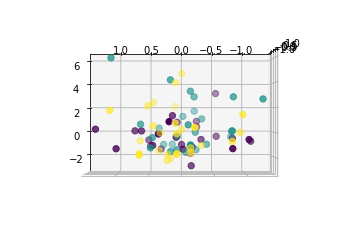

In [183]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalDf['pc1'], principalDf['pc2'],principalDf['pc3'], c=principalDf['Target'], s=40)
ax.view_init(90, 180)
plt.show()



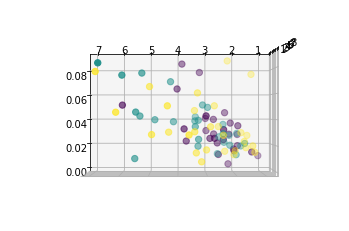

In [182]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,7], X.iloc[:,8], X.iloc[:,9], c=df['"TARGET"'], s=40)
ax.view_init(90, 180)
plt.show()



In [222]:
X2d_xmin, X2d_xmax = np.min(X_Train_embedded.iloc[:,0]), np.max(X_Train_embedded.iloc[:,0])
X2d_ymin, X2d_ymax = np.min(X_Train_embedded.iloc[:,1]), np.max(X_Train_embedded.iloc[:,1])

In [221]:
np.min(X_Train_embedded.iloc[:,0])

-2.726213669407548

In [5]:
df = NEWDF

In [13]:
# separating X and Y from the original unbalnced dataframe for testing the model on different data-frames
#class 0 vs class 1

df.loc[df['"TARGET"'] == "0", "TARGET"] = 0
df.loc[df['"TARGET"'] == "1", "TARGET"] = 1
df.loc[df['"TARGET"'] == "2", "TARGET"] = 2
#df["TARGET"] = df["TARGET"].astype("int")
class_zero = (df['"TARGET"'] == 0).values
class_one = (df['"TARGET"'] == 1).values
class_two = (df['"TARGET"'] == 2).values
zero_one = df.loc[class_zero | class_one].copy()
zero_two = df.loc[class_zero | class_two].copy()
one_two = df.loc[class_one| class_two].copy()

X01 = zero_one.iloc[:,0:-2]
y01 = zero_one.iloc[:,-2]

X02 = zero_two.iloc[:,0:-2]
y02 = zero_two.iloc[:,-2]

X12 = one_two.iloc[:,0:-2]
y12 = one_two.iloc[:,-2]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [14]:
X01.iloc[:,0:4]=X01.iloc[:,0:4]/1000
X02.iloc[:,0:4]=X02.iloc[:,0:4]/1000
X12.iloc[:,0:4]=X12.iloc[:,0:4]/1000


[[14  9  5]
 [ 7 14  7]
 [11  9  8]]


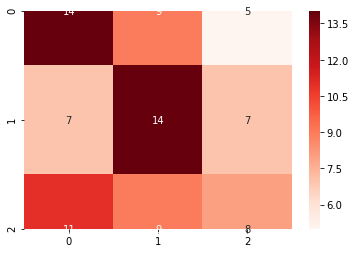

In [196]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(confusion_matrix(df['"TARGET"'], y_pred))
sns.heatmap(confusion_matrix(df['"TARGET"'], y_pred), annot=True, fmt='d', cmap="Reds"); #annot=True to annotate cells fmt: format




In [215]:
#SPLIT DATA INTO TRAIN AND TEST SET

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X01,y01,  #X_scaled
                                                    test_size =0.3, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    #stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)




(47, 8)


In [17]:
#DEFINE THE CLASSIFIER and THE PARAMETERS GRID
#WE CHOOSE DIFFERENT KERNEL AND GAMMA
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','poly','rbf'], "C":[0.1,100],"gamma":[1e-4,0.01,1]}

In [18]:
#DEFINE YOUR GRIDSEARCH 
#I'VE IMPLEMENTED A CROSS-VALIDATION IN ORDER TO GAIN THE MAX ACCURACY AND AVOID 
#OVERFITTING OF A NOISY DATASET
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=10, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)

In [37]:
gs01 = GridSearchCV(classifier, parameters, cv=10, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)
gs01 = gs.fit(X01,y01)
best_model01 = gs01.best_estimator_
y_pred01 = best_model01.predict(X01)
from sklearn.metrics import classification_report
print(classification_report(y01, y_pred01))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0386s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  54 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   9 out of  54 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  11 out of  54 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  13 out of  54 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  43 out of  54 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.1s fi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
gs02 = GridSearchCV(classifier, parameters, cv=10, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)
gs02 = gs.fit(X02,y02)
best_model02 = gs02.best_estimator_
y_pred02 = best_model02.predict(X02)
from sklearn.metrics import classification_report
print(classification_report(y02, y_pred02))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0329s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  54 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   9 out of  54 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  54 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  13 out of  54 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  54 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    2.3s fi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[[28  0]
 [11 17]]


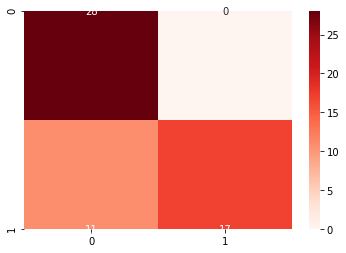

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(confusion_matrix(y02, y_pred02))
sns.heatmap(confusion_matrix(y02, y_pred02), annot=True, fmt='d', cmap="Reds"); #annot=True to annotate cells fmt: format



In [129]:
#SPLIT DATA INTO TRAIN AND TEST SET

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X12,y12,  #X_scaled
                                                    test_size =0.2, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    #stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)

(44, 10)


In [ ]:
gs02 = GridSearchCV(classifier, parameters, cv=10, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)
gs02 = gs.fit(X12,y12)
best_model12 = gs12.best_estimator_
y_pred02 = best_model02.predict(X02)
from sklearn.metrics import classification_report
print(classification_report(y12, y_pred12))

In [205]:
gs12 = GridSearchCV(classifier, parameters, cv=10, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)
gs12 = gs.fit(X12,y12)
best_model12 = gs12.best_estimator_
y_pred12 = best_model02.predict(X12)
from sklearn.metrics import classification_report
print(classification_report(y12, y_pred12))

              precision    recall  f1-score   support

           1       0.77      0.82      0.79        28
           2       0.81      0.75      0.78        28

    accuracy                           0.79        56
   macro avg       0.79      0.79      0.79        56
weighted avg       0.79      0.79      0.79        56



In [5]:
#class 0 vs class 1
df = DATA
df.loc[df.Target == "0", "Target"] = 0
df.loc[df.Target == "1", "Target"] = 1
df.loc[df.Target == "2", "Target"] = 2
df["Target"] = df["Target"].astype("int")
class_zero = (df.Target == 0).values
class_one = (df.Target == 1).values
class_two = (df.Target == 2).values
zero_one = df.loc[class_zero | class_one].copy()
zero_two = df.loc[class_zero | class_two].copy()
one_two = df.loc[class_one| class_two].copy()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


[[23  5]
 [ 7 21]]


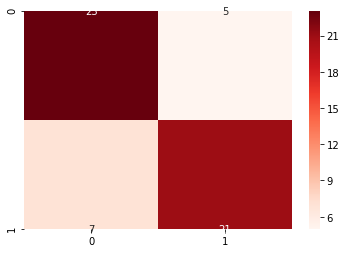

In [63]:
# Plot confusion matrix
import seaborn as sns
print(confusion_matrix(y12, y_pred12))
sns.heatmap(confusion_matrix(y12, y_pred12), annot=True, fmt='d', cmap="Reds"); #annot=True to annotate cells fmt: format



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


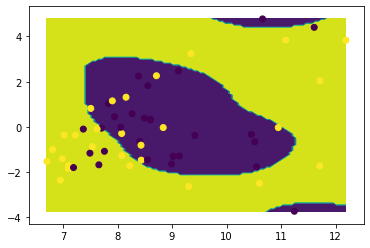

In [309]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.datasets.base import load_iris
from sklearn.manifold.t_sne import TSNE
from sklearn.linear_model.logistic import LogisticRegression

# replace the below by your data and model

X= X12
#X_Train_embedded = TSNE(n_components=2).fit_transform(X)
X_Train_embedded = TruncatedSVD(n_components=2, random_state=0).fit_transform(X)

model = LogisticRegression().fit(X,y12)
y_predicted = y12


# replace the above by your data and model

# create meshgrid
resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = SVC().fit(X_Train_embedded, y_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y12)

In [164]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt
X_Train_reduced = TruncatedSVD(n_components=7, random_state=0).fit_transform(X01)
X_Train_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_Train_reduced)

#some convert lists of lists to 2 dataframes (df_train_neg, df_train_pos) depending on the label - 

#plot the negative points and positive points
#plt.scatter(df_train_neg.val1, df_train_neg.val2, marker='o', c='red')
#plt.scatter(df_train_pos.val1, df_train_pos.val2, marker='x', c='green')

[t-SNE] Computing 55 nearest neighbors...
[t-SNE] Indexed 56 samples in 0.000s...
[t-SNE] Computed neighbors for 56 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 56 / 56
[t-SNE] Mean sigma: 27.712399
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 46.6222458, gradient norm = 0.5655122 (50 iterations in 0.017s)
[t-SNE] Iteration 100: error = 45.9691658, gradient norm = 0.5235105 (50 iterations in 0.017s)
[t-SNE] Iteration 150: error = 45.1513405, gradient norm = 0.5932321 (50 iterations in 0.017s)
[t-SNE] Iteration 200: error = 49.6685562, gradient norm = 0.4666854 (50 iterations in 0.018s)
[t-SNE] Iteration 250: error = 48.3633575, gradient norm = 0.5814003 (50 iterations in 0.019s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.363358
[t-SNE] Iteration 300: error = 1.0440470, gradient norm = 0.0015289 (50 iterations in 0.017s)
[t-SNE] Iteration 350: error = 0.9077327, gradient norm = 0.0007242 (50 

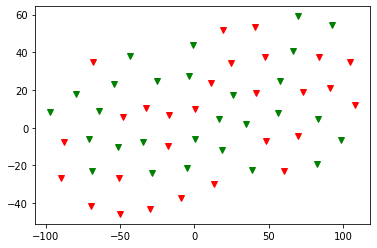

In [157]:
import numpy as np



fig,ax = plt.subplots(1,1)
plt.plot(X_Train_embedded[y01.iloc[:]==0,0],X_Train_embedded[y01.iloc[:]==0,1],'gv')
plt.plot(X_Train_embedded[y01.iloc[:]==1,0],X_Train_embedded[y01.iloc[:]==1,1],'rv')

